In [56]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [30]:
df = pd.read_csv("../input/weight-height/weight-height.csv")
df.sample(5)

,Gender,Height,Weight
6942,Female,63.422933,124.689047
8034,Female,66.245018,143.797490
5861,Female,62.659344,124.257211
6129,Female,59.307787,108.425990
5351,Female,65.942658,157.022987


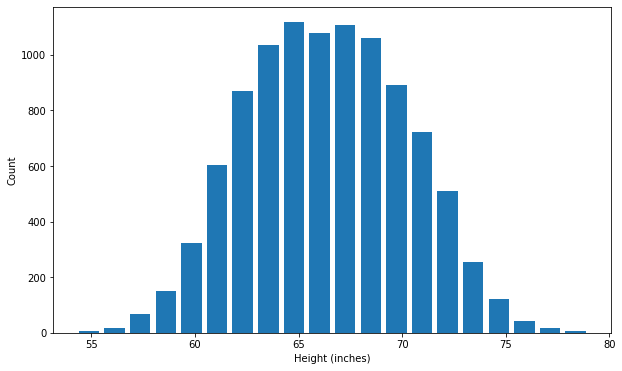

In [31]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

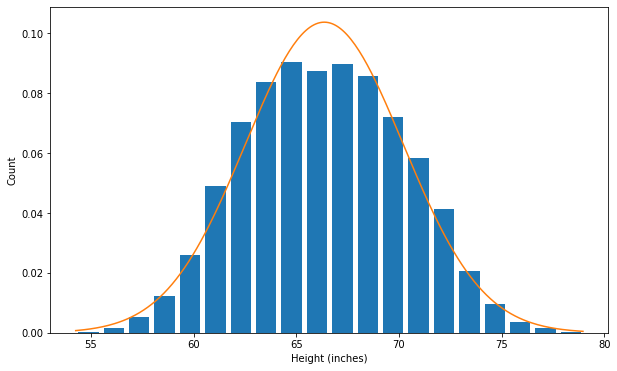

In [32]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [33]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [34]:
df.Height.mean()

66.36755975482106

In [35]:
df.Height.std()

3.8475281207732324

Here the mean is 66.37 and standard deviation is 3.84.

**(1) Outlier detection and removal using 3 standard deviation**


One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [36]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714076

In [37]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250136

Here are the outliers that are beyond 3 std dev from mean

In [38]:
df[(df.Height>upper_limit) | (df.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers
Now remove these outliers and generate new dataframe

In [39]:
df_no_outlier_std_dev = df[(df.Height<upper_limit) & (df.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [40]:
df_no_outlier_std_dev.shape

(9993, 3)

In [41]:
df.shape

(10000, 3)

**(2) Outlier detection and removal using Z Score**


Z score is a way to achieve same thing that we did above in part (1)
Z score indicates how many standard deviation away a data point is.

In [42]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [43]:
(73.84-66.37)/3.84

1.9453124999999998

Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [44]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [45]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


Here a list of outliers

In [46]:
df[(df.zscore<-3) | (df.zscore>3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


**Remove the outliers and produce new dataframe**

In [47]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [48]:
df_no_outliers.shape

(9993, 4)

In [49]:
df.shape

(10000, 4)

**3) Outlier detection usuing IQR**

In [50]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [51]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [52]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [53]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
7294,Female,54.873728,78.606670,-2.987329
9285,Female,54.263133,64.700127,-3.146027


**Remove outliers**

In [54]:
df_no_outlier = df[(df.Height>lower_limit)&(df.Height<upper_limit)]
df_no_outlier

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [55]:
df_no_outlier.shape

(9992, 4)